# Simultaneous Resistance/Reactance/Impedance
## Example H2 from the GUM

This example demonstrates three simultaneous functions and loading raw measurement data from a CSV file. All the input parameters, including mean, standard uncertainty, degrees of freedom, and correlations are determined from the data points in IVdata.csv file.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import suncal
import numpy as np

In [2]:
# Load the raw data from a file. This data is from Table H.2 in GUM.
V, J, th = np.genfromtxt('IVdata.csv', delimiter=',', skip_header=1).T

In [3]:
# Three functions to calculate
R = 'V/J * cos(theta)'
X = 'V/J * sin(theta)'
Z = 'V/J'
u = suncal.UncertCalc([R, X, Z], units=['ohm', 'ohm', 'ohm'])

k = np.sqrt(len(V))
# Note that numpy's std() function normalizes by N, not N-1! Use ddof=1.
u.set_input('V', nom=V.mean(), std=V.std(ddof=1)/k, units='volt')
u.set_input('J', nom=J.mean(), std=J.std(ddof=1)/k, units='mA')
u.set_input('theta', nom=th.mean(), std=th.std(ddof=1)/k, units='rad')

# Use numpy to determine correlation coefficients, set matrix directly.
u.set_correlation(np.corrcoef(np.vstack((V, J, th))))

In [4]:
out = u.calculate()
out.report(n=3)

$\frac{V \cos{\left (\theta \right )}}{J}$


Method             | Mean      | Standard Uncertainty  
------------------|---------|----------------------
GUM Approximation  | 127.7322 Ω  | 0.0711 Ω              
Monte Carlo        | 127.7320 Ω  | 0.0711 Ω              


$\frac{V \sin{\left (\theta \right )}}{J}$


Method             | Mean      | Standard Uncertainty  
------------------|---------|----------------------
GUM Approximation  | 219.847 Ω  | 0.296 Ω              
Monte Carlo        | 219.847 Ω  | 0.295 Ω              


$\frac{V}{J}$


Method             | Mean      | Standard Uncertainty  
------------------|---------|----------------------
GUM Approximation  | 254.260 Ω  | 0.236 Ω              
Monte Carlo        | 254.260 Ω  | 0.236 Ω

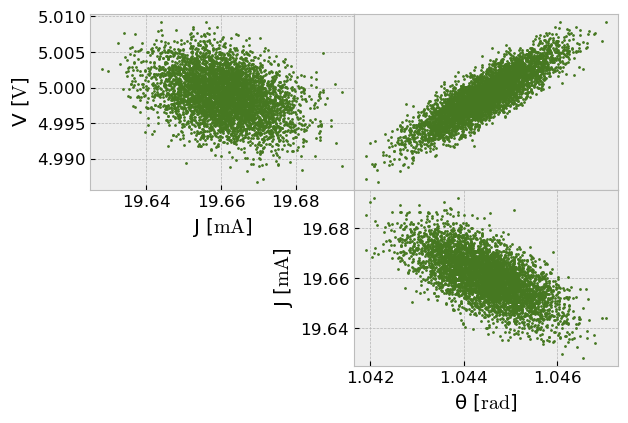

In [5]:
# Scatter plot will show the correlations between variables. Reducing number of points in scatter plot to speed up drawing.
u.out.plot_xscatter(points=5000);

In [6]:
u.out.report_expanded()

$\frac{V \cos{\left (\theta \right )}}{J}$

### GUM Approximation


Interval   | Min       | Max       | k         | Deg. Freedom   | Expanded Uncertainty  
----------|---------|---------|---------|--------------|----------------------
99.00%     | 127.55 Ω  | 127.92 Ω  | 2.576     | inf            | 0.18 Ω              
95.00%     | 127.59 Ω  | 127.87 Ω  | 1.960     | inf            | 0.14 Ω              
90.00%     | 127.62 Ω  | 127.85 Ω  | 1.645     | inf            | 0.12 Ω              
68.00%     | 127.661 Ω  | 127.803 Ω | 0.994     | inf            | 0.071 Ω             


### Monte Carlo

Symmetric Coverage Intervals

Interval   | Min       | Max       | k        
----------|---------|---------|---------
99.00%     | 127.548 Ω  | 127.914 Ω  | 2.572    
95.00%     | 127.592 Ω  | 127.871 Ω  | 1.959    
90.00%     | 127.615 Ω  | 127.849 Ω  | 1.645    
68.00%     | 127.661 Ω  | 127.803 Ω  | 0.995    



---

$\frac{V \sin{\left (\theta \right )}}{J}$

### GUM Approximation


Interval   | Min       | Max       | k         | Deg. Freedom   | Expanded Uncertainty  
----------|---------|---------|---------|--------------|----------------------
99.00%     | 219.09 Ω  | 220.61 Ω  | 2.576     | inf            | 0.76 Ω              
95.00%     | 219.27 Ω  | 220.43 Ω  | 1.960     | inf            | 0.58 Ω              
90.00%     | 219.36 Ω  | 220.33 Ω  | 1.645     | inf            | 0.49 Ω              
68.00%     | 219.55 Ω  | 220.14 Ω | 0.994     | inf            | 0.29 Ω             


### Monte Carlo

Symmetric Coverage Intervals

Interval   | Min       | Max       | k        
----------|---------|---------|---------
99.00%     | 219.09 Ω  | 220.61 Ω  | 2.576    
95.00%     | 219.27 Ω  | 220.43 Ω  | 1.961    
90.00%     | 219.36 Ω  | 220.33 Ω  | 1.644    
68.00%     | 219.55 Ω  | 220.14 Ω  | 0.994    



---

$\frac{V}{J}$

### GUM Approximation


Interval   | Min       | Max       | k         | Deg. Freedom   | Expanded Uncertainty  
----------|---------|---------|---------|--------------|----------------------
99.00%     | 253.65 Ω  | 254.87 Ω  | 2.576     | inf            | 0.61 Ω              
95.00%     | 253.80 Ω  | 254.72 Ω  | 1.960     | inf            | 0.46 Ω              
90.00%     | 253.87 Ω  | 254.65 Ω  | 1.645     | inf            | 0.39 Ω              
68.00%     | 254.02 Ω  | 254.49 Ω | 0.994     | inf            | 0.24 Ω             


### Monte Carlo

Symmetric Coverage Intervals

Interval   | Min       | Max       | k        
----------|---------|---------|---------
99.00%     | 253.65 Ω  | 254.87 Ω  | 2.575    
95.00%     | 253.80 Ω  | 254.72 Ω  | 1.961    
90.00%     | 253.87 Ω  | 254.65 Ω  | 1.645    
68.00%     | 254.03 Ω  | 254.49 Ω  | 0.994

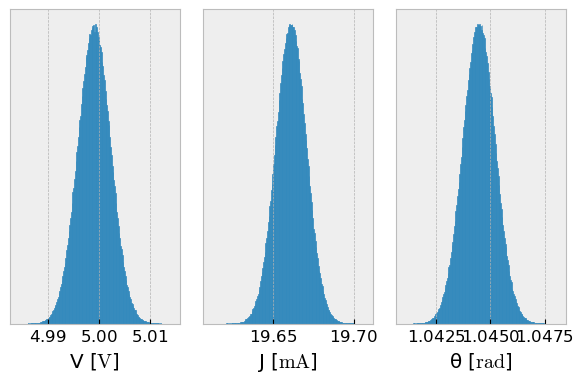

In [7]:
f = plt.figure(figsize=(6,4))
u.out.plot_xhists(fig=f)

In [8]:
u.out.report_derivation()

### Model Equation:

$\frac{V \cos{\left (\theta \right )}}{J}$

### Input Definitions:


Variable   | Std. Uncertainty  
----------|------------------
$V = 4.999\,\mathrm{V}$   | $u_{V} = 0.003209\,\mathrm{V}$          
$J = 19.66\,\mathrm{mA}$   | $u_{J} = 0.009471\,\mathrm{mA}$          
$\theta = 1.044\,\mathrm{rad}$   | $u_{theta} = 0.0007521\,\mathrm{rad}$          


Correlation coefficients:

$\sigma_{V,J} = -0.355$

$\sigma_{V,theta} = 0.858$

$\sigma_{J,theta} = -0.645$

### Sensitivity Coefficients:

$c_{V} = \frac{\partial}{\partial V} \frac{V \cos{\left (\theta \right )}}{J} = \frac{\cos{\left (\theta \right )}}{J} = 0.02555\,\frac{1}{\mathrm{mA}}$

$c_{J} = \frac{\partial}{\partial J} \frac{V \cos{\left (\theta \right )}}{J} = - \frac{V \cos{\left (\theta \right )}}{J^{2}} = -0.006497\,\frac{\mathrm{V}}{\mathrm{mA}^{2}}$

$c_{\theta} = \frac{\partial}{\partial \theta} \frac{V \cos{\left (\theta \right )}}{J} = - \frac{V \sin{\left (\theta \right )}}{J} = -0.2198\,\frac{\mathrm{V}}{\mathrm{mA}}$

### Combined uncertainty:

$u_{c} = \sqrt{c_{J}^{2} u_{J}^{2} + c_{V}^{2} u_{V}^{2} + c_{\theta}^{2} u_{\theta}^{2} + 2 \sigma_{J,theta} u_{J} u_{\theta} \frac{\partial}{\partial J} \frac{V \cos{\left (\theta \right )}}{J} \frac{\partial}{\partial \theta} \frac{V \cos{\left (\theta \right )}}{J} + 2 \sigma_{V,J} u_{J} u_{V} \frac{\partial}{\partial J} \frac{V \cos{\left (\theta \right )}}{J} \frac{\partial}{\partial V} \frac{V \cos{\left (\theta \right )}}{J} + 2 \sigma_{V,theta} u_{V} u_{\theta} \frac{\partial}{\partial V} \frac{V \cos{\left (\theta \right )}}{J} \frac{\partial}{\partial \theta} \frac{V \cos{\left (\theta \right )}}{J}}$

$u_{c} = \sqrt{2 \sigma_{J,theta} u_{J} u_{\theta} \frac{\partial}{\partial J} \frac{V \cos{\left (\theta \right )}}{J} \frac{\partial}{\partial \theta} \frac{V \cos{\left (\theta \right )}}{J} + 2 \sigma_{V,J} u_{J} u_{V} \frac{\partial}{\partial J} \frac{V \cos{\left (\theta \right )}}{J} \frac{\partial}{\partial V} \frac{V \cos{\left (\theta \right )}}{J} + 2 \sigma_{V,theta} u_{V} u_{\theta} \frac{\partial}{\partial V} \frac{V \cos{\left (\theta \right )}}{J} \frac{\partial}{\partial \theta} \frac{V \cos{\left (\theta \right )}}{J} + u_{J}^{2} \left(\frac{\partial}{\partial J} \frac{V \cos{\left (\theta \right )}}{J}\right)^{2} + u_{V}^{2} \left(\frac{\partial}{\partial V} \frac{V \cos{\left (\theta \right )}}{J}\right)^{2} + u_{\theta}^{2} \left(\frac{\partial}{\partial \theta} \frac{V \cos{\left (\theta \right )}}{J}\right)^{2}}$

$u_{c} = \sqrt{\frac{V^{2} u_{\theta}^{2} \sin^{2}{\left (\theta \right )}}{J^{2}} - \frac{2 V \sigma_{V,theta} u_{V} u_{\theta} \sin{\left (\theta \right )} \cos{\left (\theta \right )}}{J^{2}} + \frac{u_{V}^{2} \cos^{2}{\left (\theta \right )}}{J^{2}} + \frac{2 V^{2} \sigma_{J,theta} u_{J} u_{\theta} \sin{\left (\theta \right )} \cos{\left (\theta \right )}}{J^{3}} - \frac{2 V \sigma_{V,J} u_{J} u_{V} \cos^{2}{\left (\theta \right )}}{J^{3}} + \frac{V^{2} u_{J}^{2} \cos^{2}{\left (\theta \right )}}{J^{4}}} = 0.07107\,\mathrm{ \Omega }$

### Effective degrees of freedom:

$\nu_{eff} = \frac{u_{c}^{4}}{\frac{c_{J}^{4} u_{J}^{4}}{\nu_{J}} + \frac{c_{V}^{4} u_{V}^{4}}{\nu_{V}} + \frac{c_{\theta}^{4} u_{\theta}^{4}}{\nu_{\theta}}} = \infty$


---

### Model Equation:

$\frac{V \sin{\left (\theta \right )}}{J}$

### Input Definitions:


Variable   | Std. Uncertainty  
----------|------------------
$V = 4.999\,\mathrm{V}$   | $u_{V} = 0.003209\,\mathrm{V}$          
$J = 19.66\,\mathrm{mA}$   | $u_{J} = 0.009471\,\mathrm{mA}$          
$\theta = 1.044\,\mathrm{rad}$   | $u_{theta} = 0.0007521\,\mathrm{rad}$          


Correlation coefficients:

$\sigma_{V,J} = -0.355$

$\sigma_{V,theta} = 0.858$

$\sigma_{J,theta} = -0.645$

### Sensitivity Coefficients:

$c_{V} = \frac{\partial}{\partial V} \frac{V \sin{\left (\theta \right )}}{J} = \frac{\sin{\left (\theta \right )}}{J} = 0.04398\,\frac{1}{\mathrm{mA}}$

$c_{J} = \frac{\partial}{\partial J} \frac{V \sin{\left (\theta \right )}}{J} = - \frac{V \sin{\left (\theta \right )}}{J^{2}} = -0.01118\,\frac{\mathrm{V}}{\mathrm{mA}^{2}}$

$c_{\theta} = \frac{\partial}{\partial \theta} \frac{V \sin{\left (\theta \right )}}{J} = \frac{V \cos{\left (\theta \right )}}{J} = 0.1277\,\frac{\mathrm{V}}{\mathrm{mA}}$

### Combined uncertainty:

$u_{c} = \sqrt{c_{J}^{2} u_{J}^{2} + c_{V}^{2} u_{V}^{2} + c_{\theta}^{2} u_{\theta}^{2} + 2 \sigma_{J,theta} u_{J} u_{\theta} \frac{\partial}{\partial J} \frac{V \sin{\left (\theta \right )}}{J} \frac{\partial}{\partial \theta} \frac{V \sin{\left (\theta \right )}}{J} + 2 \sigma_{V,J} u_{J} u_{V} \frac{\partial}{\partial J} \frac{V \sin{\left (\theta \right )}}{J} \frac{\partial}{\partial V} \frac{V \sin{\left (\theta \right )}}{J} + 2 \sigma_{V,theta} u_{V} u_{\theta} \frac{\partial}{\partial V} \frac{V \sin{\left (\theta \right )}}{J} \frac{\partial}{\partial \theta} \frac{V \sin{\left (\theta \right )}}{J}}$

$u_{c} = \sqrt{2 \sigma_{J,theta} u_{J} u_{\theta} \frac{\partial}{\partial J} \frac{V \sin{\left (\theta \right )}}{J} \frac{\partial}{\partial \theta} \frac{V \sin{\left (\theta \right )}}{J} + 2 \sigma_{V,J} u_{J} u_{V} \frac{\partial}{\partial J} \frac{V \sin{\left (\theta \right )}}{J} \frac{\partial}{\partial V} \frac{V \sin{\left (\theta \right )}}{J} + 2 \sigma_{V,theta} u_{V} u_{\theta} \frac{\partial}{\partial V} \frac{V \sin{\left (\theta \right )}}{J} \frac{\partial}{\partial \theta} \frac{V \sin{\left (\theta \right )}}{J} + u_{J}^{2} \left(\frac{\partial}{\partial J} \frac{V \sin{\left (\theta \right )}}{J}\right)^{2} + u_{V}^{2} \left(\frac{\partial}{\partial V} \frac{V \sin{\left (\theta \right )}}{J}\right)^{2} + u_{\theta}^{2} \left(\frac{\partial}{\partial \theta} \frac{V \sin{\left (\theta \right )}}{J}\right)^{2}}$

$u_{c} = \sqrt{\frac{V^{2} u_{\theta}^{2} \cos^{2}{\left (\theta \right )}}{J^{2}} + \frac{2 V \sigma_{V,theta} u_{V} u_{\theta} \sin{\left (\theta \right )} \cos{\left (\theta \right )}}{J^{2}} + \frac{u_{V}^{2} \sin^{2}{\left (\theta \right )}}{J^{2}} - \frac{2 V^{2} \sigma_{J,theta} u_{J} u_{\theta} \sin{\left (\theta \right )} \cos{\left (\theta \right )}}{J^{3}} - \frac{2 V \sigma_{V,J} u_{J} u_{V} \sin^{2}{\left (\theta \right )}}{J^{3}} + \frac{V^{2} u_{J}^{2} \sin^{2}{\left (\theta \right )}}{J^{4}}} = 0.2956\,\mathrm{ \Omega }$

### Effective degrees of freedom:

$\nu_{eff} = \frac{u_{c}^{4}}{\frac{c_{J}^{4} u_{J}^{4}}{\nu_{J}} + \frac{c_{V}^{4} u_{V}^{4}}{\nu_{V}} + \frac{c_{\theta}^{4} u_{\theta}^{4}}{\nu_{\theta}}} = \infty$


---

### Model Equation:

$\frac{V}{J}$

### Input Definitions:


Variable   | Std. Uncertainty  
----------|------------------
$V = 4.999\,\mathrm{V}$   | $u_{V} = 0.003209\,\mathrm{V}$          
$J = 19.66\,\mathrm{mA}$   | $u_{J} = 0.009471\,\mathrm{mA}$          


Correlation coefficients:

$\sigma_{V,J} = -0.355$

### Sensitivity Coefficients:

$c_{V} = \frac{\partial}{\partial V} \frac{V}{J} = \frac{1}{J} = 0.05086\,\frac{1}{\mathrm{mA}}$

$c_{J} = \frac{\partial}{\partial J} \frac{V}{J} = - \frac{V}{J^{2}} = -0.01293\,\frac{\mathrm{V}}{\mathrm{mA}^{2}}$

### Combined uncertainty:

$u_{c} = \sqrt{c_{J}^{2} u_{J}^{2} + c_{V}^{2} u_{V}^{2} + 2 \sigma_{V,J} u_{J} u_{V} \frac{\partial}{\partial J} \frac{V}{J} \frac{\partial}{\partial V} \frac{V}{J}}$

$u_{c} = \sqrt{2 \sigma_{V,J} u_{J} u_{V} \frac{\partial}{\partial J} \frac{V}{J} \frac{\partial}{\partial V} \frac{V}{J} + u_{J}^{2} \left(\frac{\partial}{\partial J} \frac{V}{J}\right)^{2} + u_{V}^{2} \left(\frac{\partial}{\partial V} \frac{V}{J}\right)^{2}}$

$u_{c} = \sqrt{\frac{u_{V}^{2}}{J^{2}} - \frac{2 V \sigma_{V,J} u_{J} u_{V}}{J^{3}} + \frac{V^{2} u_{J}^{2}}{J^{4}}} = 0.2363\,\mathrm{ \Omega }$

### Effective degrees of freedom:

$\nu_{eff} = \frac{u_{c}^{4}}{\frac{c_{J}^{4} u_{J}^{4}}{\nu_{J}} + \frac{c_{V}^{4} u_{V}^{4}}{\nu_{V}}} = \infty$


---